# EEGMapping: Group Analysis (Local Data)

In [1]:
%matplotlib inline
%load_ext autoreload

import os
import pickle

import mne
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from scipy.stats import ttest_1samp, ttest_ind, sem, pearsonr

from fooof import FOOOF, FOOOFGroup

In [2]:
# Import custom code for this analysis
%autoreload 2
from plots import *
from utilities import *
from analysis import *

## Settings

Put all general settings here. 

In [3]:
# Set whether to save out all the figures
SAVE_FIGS = False

# Whether to make the data
MASKING = False

# This controls how much stuff MNE prints out
mne.set_log_level(verbose=False)

# Loading information

In [4]:
#lOADING CHANNELS FROM txt
#save_path = "C:\\Users\\abc\\EEG-MNE\\data"
save_path = '../data'

chan_dat = 'channel_dat.txt'
chan_file = os.path.join(save_path, chan_dat)

In [5]:
# Set up subject numbers
subj_dat_num = list(range(3502, 3516))
subj_dat_num2 =list(range(3001, 3015))
all_subj = subj_dat_num + subj_dat_num2

In [6]:
# #LOADING CHANNELS from raw data
# # This base path will need updating
base_path = 'D:\\abc\\Documents\\Research\\PBA_Data'

# These should stay the same
subj_dat_fname = '._3001_resampled.set'
subj_dat_fname = '3002_resampled.set'
full_path = os.path.join(base_path, subj_dat_fname)
eeg_dat = mne.io.read_raw_eeglab(full_path, preload=True)

# For Tom's Computer
# save_path = '/Users/tom/Documents/Research/1-Projects/Phase/Experiments/PBA/2-Data/PBA-3/2-processed/EEG'
# eeg_dat = mne.io.read_raw_eeglab(os.path.join(save_path, '3002_resampled.set'), preload=True, verbose=False)

<ipython-input-6-229a4e1bb9c6>:9: DeprecationWarning: stim_channel (default True in 0.17) will change to False in 0.18 and be removed in 0.19, set it to False in 0.17 to avoid this warning
  eeg_dat = mne.io.read_raw_eeglab(full_path, preload=True)
<ipython-input-6-229a4e1bb9c6>:9: RuntimeWarning: 5738/6872 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  eeg_dat = mne.io.read_raw_eeglab(full_path, preload=True)
<ipython-input-6-229a4e1bb9c6>:9: RuntimeWarning: Events like the following will be dropped entirely: ['Exp_Block_Start', 'Saw', 'Flash_instr', 'Thresh_Block_End', 'Catch_thresh'], 26 in total
  eeg_dat = mne.io.read_raw_eeglab(full_path, preload=True)


In [7]:
# Load and set the montage for the data
montage = mne.channels.read_montage('standard_1020', eeg_dat.ch_names)
eeg_dat.set_montage(montage)

<RawEEGLAB  |  3002_resampled.fdt, n_channels x n_times : 65 x 1896482 (3793.0 sec), ~940.6 MB, data loaded>

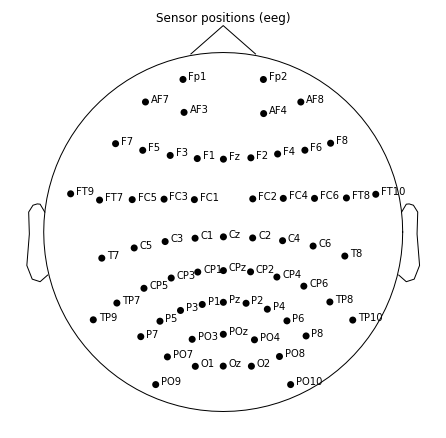

In [8]:
# Check the sensor map
eeg_dat.plot_sensors(show_names=True);

In [9]:
# Extract channel positions from a subjects data object
pos_new = np.asarray([ch['loc'][:3] for ch in eeg_dat.info['chs']])

# Drop stim channel
pos_new = pos_new[:-1, :]

In [10]:
# Update montage with channel positions
montage.pos = pos_new
pos = montage.get_pos2d()
montage = None

# DATA SET UP

In [11]:
# Load oscillations data
rtPB_rest_results = load_pickle('rtPB_rest_results')
rtPB_trial_results = load_pickle('rtPB_trial_results')
PBA_rest_results = load_pickle('PBA_rest_results')
PBA_trial_results = load_pickle('PBA_trial_results')

In [12]:
# Load exponent data
rtPB_rest_exponent_results = load_pickle('rtPB_rest_exponent_results')
rtPB_trial_exponent_results = load_pickle('rtPB_trial_exponent_results')
PBA_rest_exponent_results = load_pickle('PBA_rest_exponent_results')
PBA_trial_exponent_results = load_pickle('PBA_trial_exponent_results')

## Masking

In [13]:
# Set the channel cluster of interest
pos_ch_cluster = ['Oz','O1','O2','POz','PO3','PO4','PO7','PO8','PO9','PO10']
# Check the indices for the channel cluster
pos_ch_cluster_index = masking_cluster(pos_ch_cluster, eeg_dat)

# Analyses across STATE

In [14]:
# Set up date for state plots
rtpb_all_osc_data = [rtPB_trial_results, rtPB_rest_results]
pba_all_osc_data = [PBA_trial_results, PBA_rest_results]
comb_all_osc_data = [combine_groups_dict(rtPB_trial_results, PBA_trial_results),
                     combine_groups_dict(rtPB_rest_results, PBA_rest_results)]

# Make list of possible groups to run
groups_oscs = [rtpb_all_osc_data, pba_all_osc_data, comb_all_osc_data]

rtpb_all_exponent_data = [rtPB_trial_exponent_results, rtPB_rest_exponent_results]
pba_all_exponent_data = [PBA_trial_exponent_results, PBA_rest_exponent_results]
comb_all_exponent_data = [combine_groups_array(rtPB_trial_exponent_results, PBA_trial_exponent_results),
                       combine_groups_array(rtPB_rest_exponent_results, PBA_rest_exponent_results)]

# Make list of possible groups to run
groups_exponents = [rtpb_all_exponent_data, pba_all_exponent_data, comb_all_exponent_data]

# Set labels for group lists
labels = ['rtpb', 'pba', 'comb']


# within sample ttest

C:\Users\abc\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


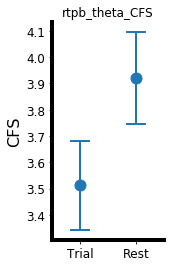

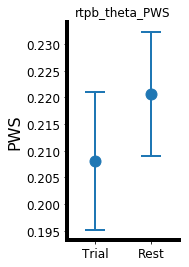

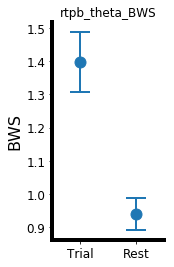

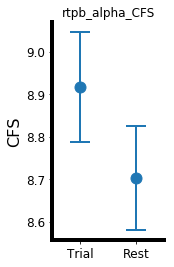

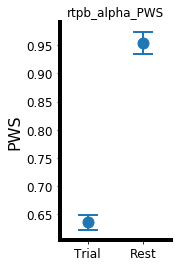

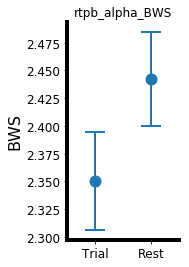

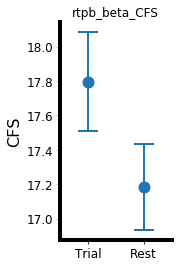

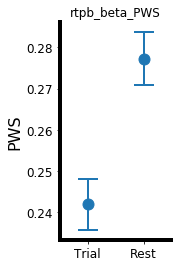

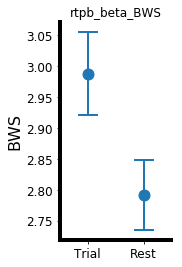

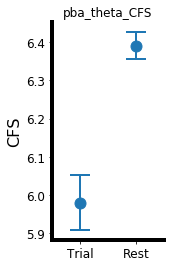

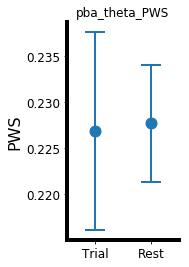

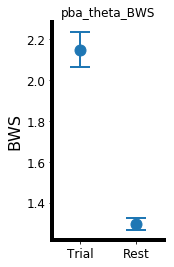

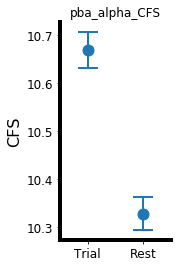

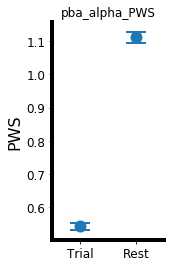

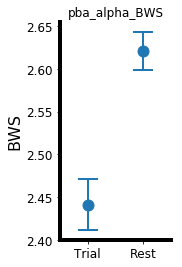

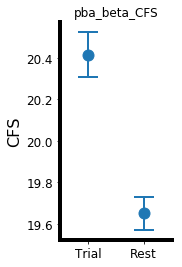

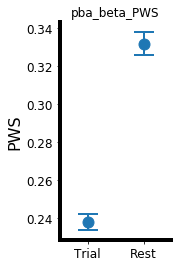

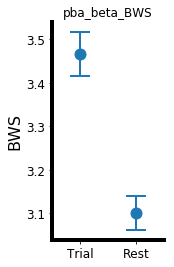

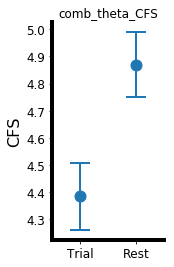

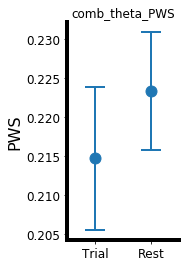

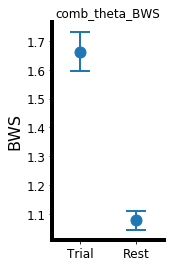

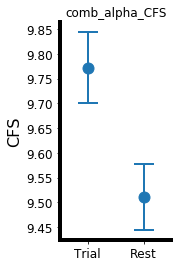

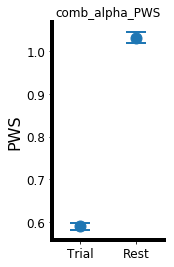

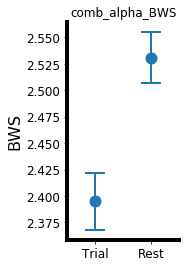

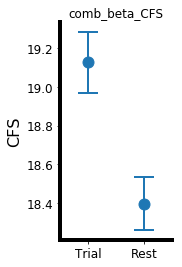

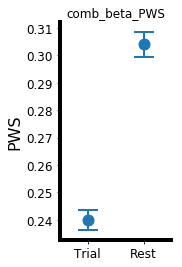

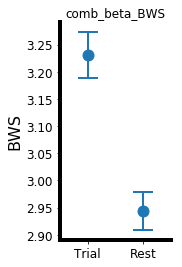

In [15]:
# Run analysis across state - oscs
corr_dicts = []
for label, group in zip(labels, groups_oscs):
    corr_dicts.append(run_state_dict(group, label, False, SAVE_FIGS))

In [16]:
corr_dicts

[{'rtpb_theta_CFS': Ttest_indResult(statistic=-1.6777093358501867, pvalue=0.09388681013083222),
  'rtpb_theta_PWS': Ttest_indResult(statistic=-0.7192959252735608, pvalue=0.4722183231288807),
  'rtpb_theta_BWS': Ttest_indResult(statistic=4.5124677736956444, pvalue=7.61146357918875e-06),
  'rtpb_alpha_CFS': Ttest_indResult(statistic=1.202125210109119, pvalue=0.22947591168614814),
  'rtpb_alpha_PWS': Ttest_indResult(statistic=-13.526436868444287, pvalue=9.60701233853135e-40),
  'rtpb_alpha_BWS': Ttest_indResult(statistic=-1.4980508774047925, pvalue=0.13429844231242044),
  'rtpb_beta_CFS': Ttest_indResult(statistic=1.6130072321230295, pvalue=0.10692723780110092),
  'rtpb_beta_PWS': Ttest_indResult(statistic=-3.9679436335339022, pvalue=7.548881301522028e-05),
  'rtpb_beta_BWS': Ttest_indResult(statistic=2.2413623840366967, pvalue=0.025130306598596268)},
 {'pba_theta_CFS': Ttest_indResult(statistic=-5.396613485307234, pvalue=1.2012111614698326e-07),
  'pba_theta_PWS': Ttest_indResult(statist

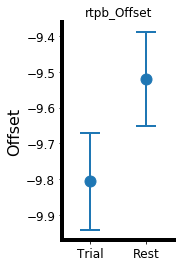

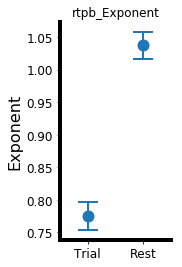

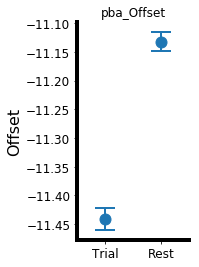

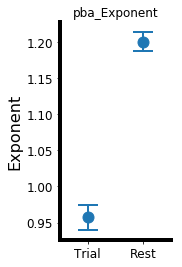

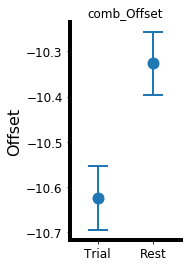

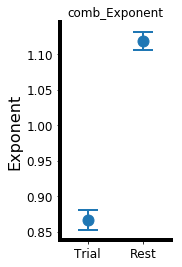

In [17]:
# Run analysis across state - exponent
corr_dict_exp = []
for label, group in zip(labels, groups_exponents):
    corr_dict_exp.append(run_state_array(group, label, False, ['Offset', 'Exponent'], SAVE_FIGS))

In [18]:
corr_dict_exp

[{'rtpb_Offset': Ttest_indResult(statistic=-1.5132909453881371, pvalue=0.13038230528538194),
  'rtpb_Exponent': Ttest_indResult(statistic=-8.861841984928978, pvalue=1.8567330633807856e-18)},
 {'pba_Offset': Ttest_indResult(statistic=-12.212729602275031, pvalue=5.256382212423269e-33),
  'pba_Exponent': Ttest_indResult(statistic=-11.131320318283706, pvalue=7.09408122105097e-28)},
 {'comb_Offset': Ttest_indResult(statistic=-3.0047088201955043, pvalue=0.0026767647905085895),
  'comb_Exponent': Ttest_indResult(statistic=-13.577717459024711, pvalue=5.517376279129473e-41)}]

# Analyses Across SPACE

CURRENT FEATURE: CFS


C:\Users\abc\Documents\Research\EEGMapping\local\notebooks\utilities.py:81: RuntimeWarning: Mean of empty slice
  bloc_aver_set = np.nanmean(feat_set, axis = 1)


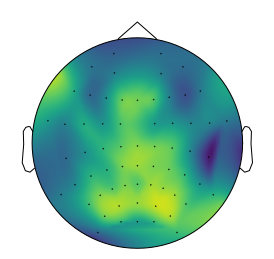

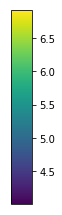

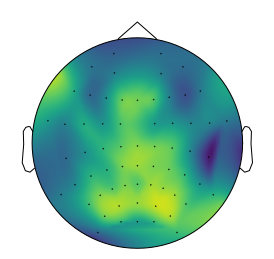

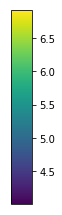

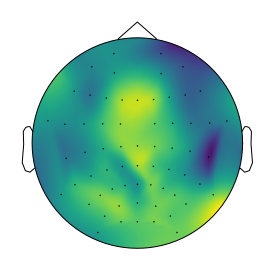

Both_Trial_theta_M_L: (-0.5853554817275747, 3.7693422215553446e-07)
Both_Trial_theta_P_A: (-0.4235425640542379, 0.00048801770537153564)
CURRENT FEATURE: PWS


C:\Users\abc\Documents\Research\EEGMapping\local\notebooks\utilities.py:81: RuntimeWarning: Mean of empty slice
  bloc_aver_set = np.nanmean(feat_set, axis = 1)


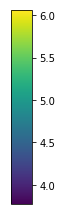

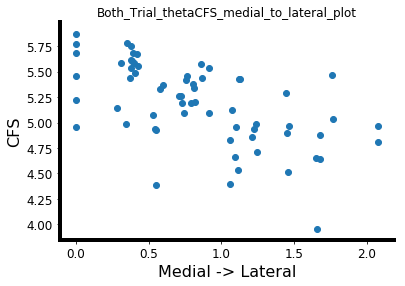

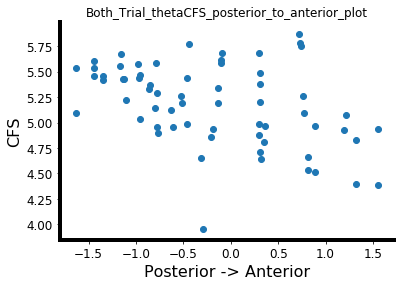

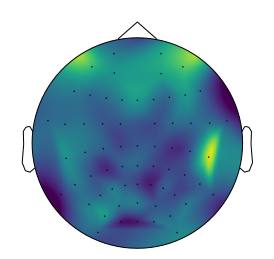

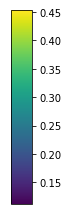

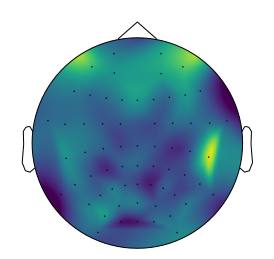

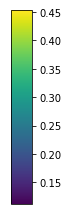

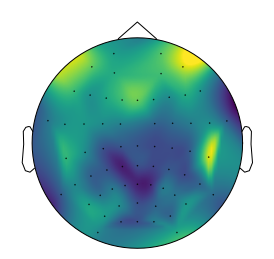

Both_Trial_theta_M_L: (0.2873925817265929, 0.02129930023547012)
Both_Trial_theta_P_A: (0.5239186377943559, 8.876440351091817e-06)
CURRENT FEATURE: BWS


C:\Users\abc\Documents\Research\EEGMapping\local\notebooks\utilities.py:81: RuntimeWarning: Mean of empty slice
  bloc_aver_set = np.nanmean(feat_set, axis = 1)


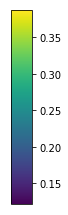

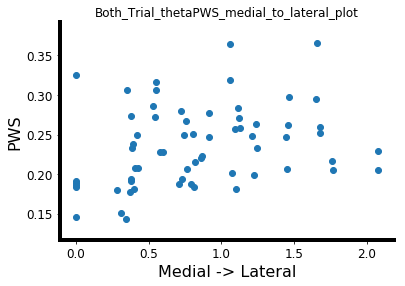

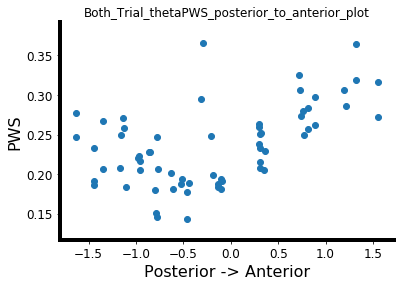

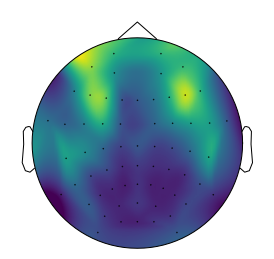

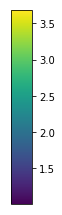

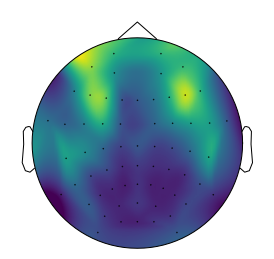

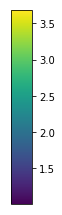

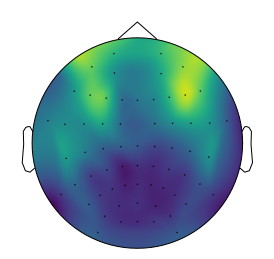

Both_Trial_theta_M_L: (0.34337135027291543, 0.005472300988479163)
Both_Trial_theta_P_A: (0.8315497026387829, 1.7747273707300318e-17)
CURRENT FEATURE: CFS


C:\Users\abc\Documents\Research\EEGMapping\local\notebooks\utilities.py:81: RuntimeWarning: Mean of empty slice
  bloc_aver_set = np.nanmean(feat_set, axis = 1)


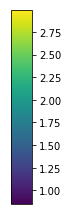

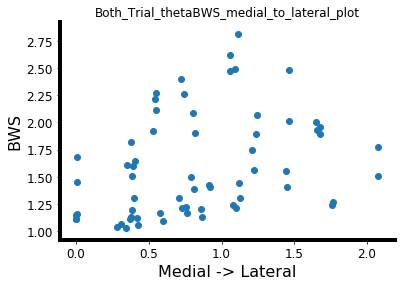

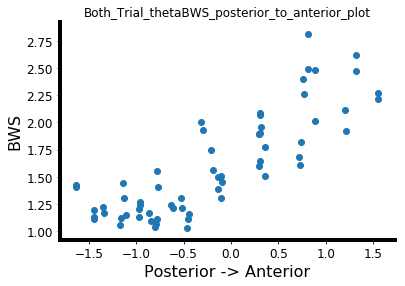

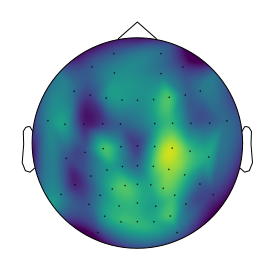

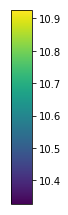

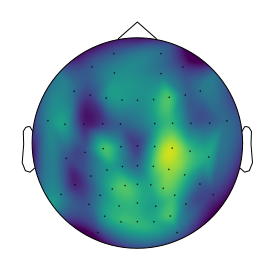

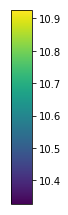

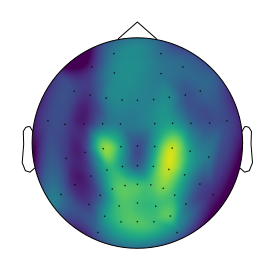

Both_Trial_alpha_M_L: (-0.5836655260964572, 4.147830371655886e-07)
Both_Trial_alpha_P_A: (-0.36518907392363764, 0.00300578167676067)
CURRENT FEATURE: PWS


C:\Users\abc\Documents\Research\EEGMapping\local\notebooks\utilities.py:81: RuntimeWarning: Mean of empty slice
  bloc_aver_set = np.nanmean(feat_set, axis = 1)


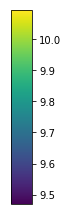

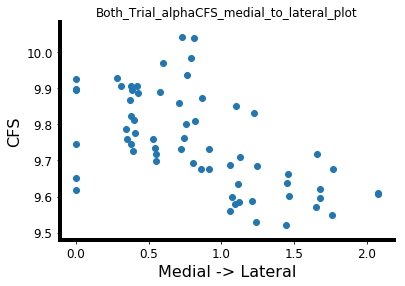

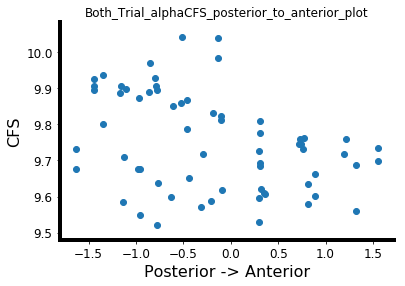

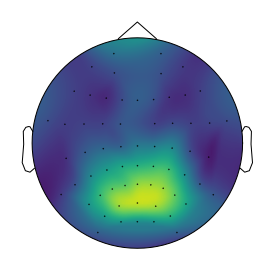

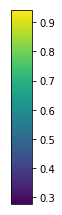

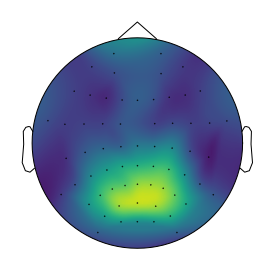

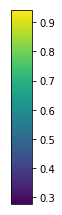

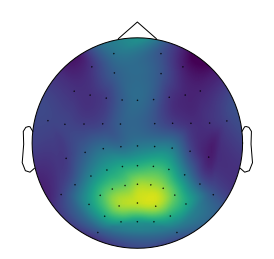

Both_Trial_alpha_M_L: (-0.5847488989299163, 3.90129055319104e-07)
Both_Trial_alpha_P_A: (-0.6619976734938775, 2.575589365503454e-09)
CURRENT FEATURE: BWS


C:\Users\abc\Documents\Research\EEGMapping\local\notebooks\utilities.py:81: RuntimeWarning: Mean of empty slice
  bloc_aver_set = np.nanmean(feat_set, axis = 1)


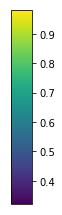

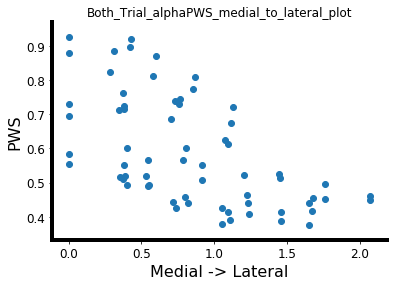

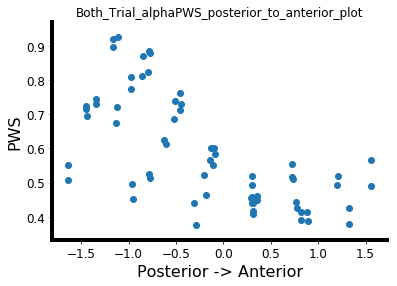

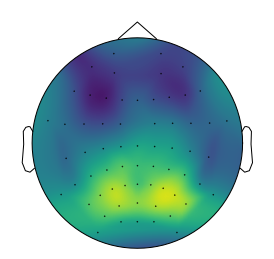

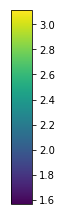

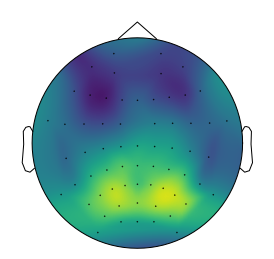

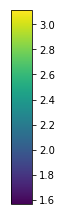

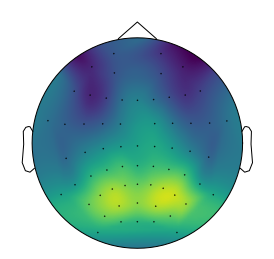

Both_Trial_alpha_M_L: (-0.3699354449985638, 0.002623906930653247)
Both_Trial_alpha_P_A: (-0.8665378428715859, 2.2502196023215874e-20)
CURRENT FEATURE: CFS


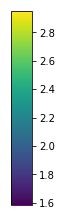

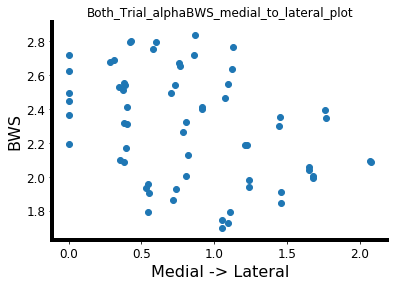

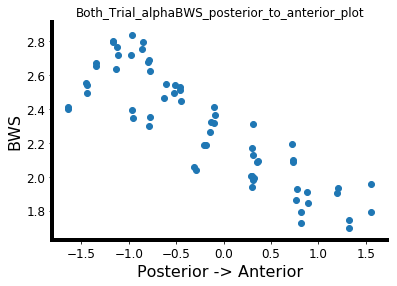

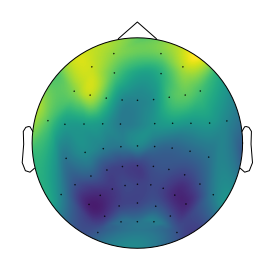

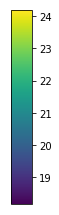

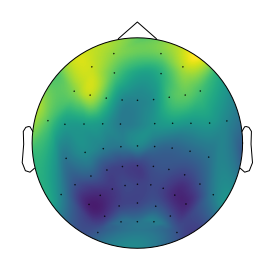

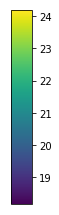

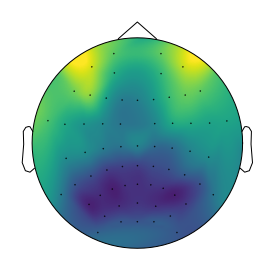

Both_Trial_beta_M_L: (0.3779279483275554, 0.0020777058280753487)
Both_Trial_beta_P_A: (0.867298697742778, 1.9071042895241694e-20)
CURRENT FEATURE: PWS


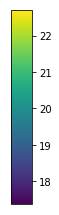

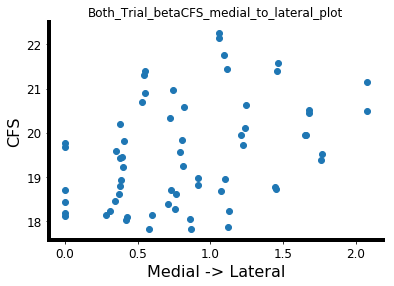

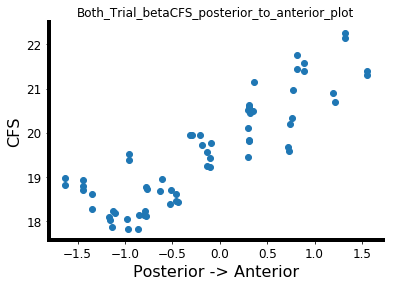

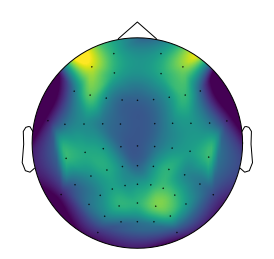

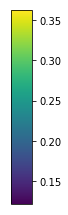

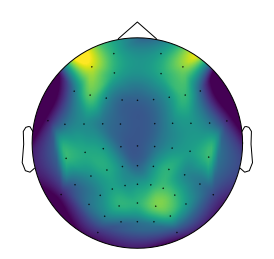

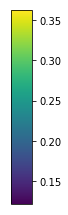

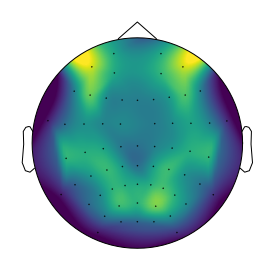

Both_Trial_beta_M_L: (-0.25615297535643033, 0.04104659791864185)
Both_Trial_beta_P_A: (0.27851150762269555, 0.02584903051953268)
CURRENT FEATURE: BWS


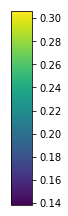

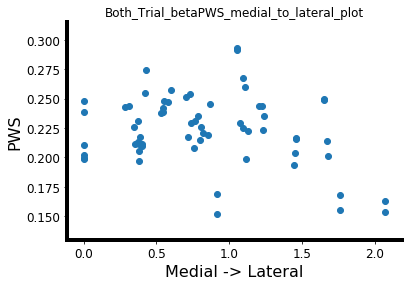

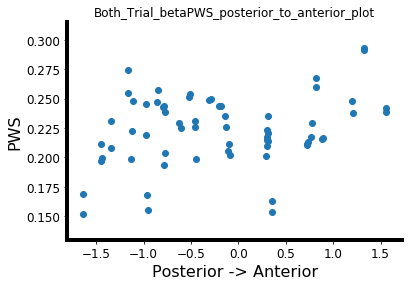

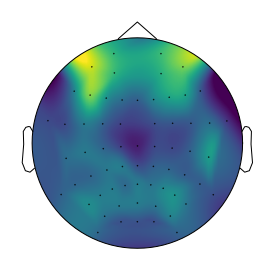

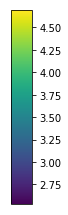

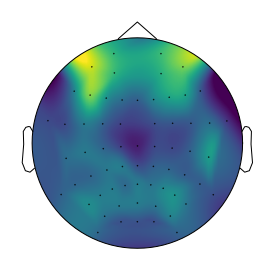

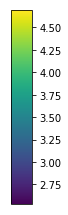

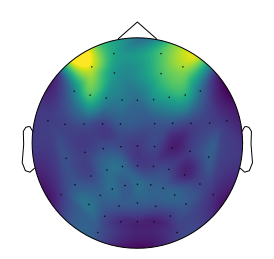

Both_Trial_beta_M_L: (-0.0771766671853272, 0.5444153149887034)
Both_Trial_beta_P_A: (0.6652228231604715, 2.02266547403184e-09)


ValueError: too many values to unpack (expected 2)

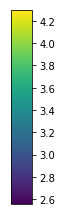

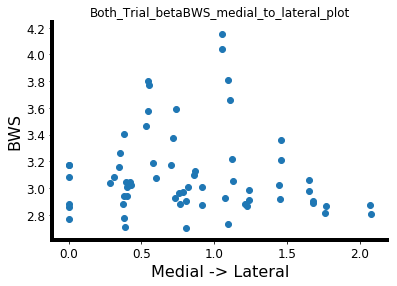

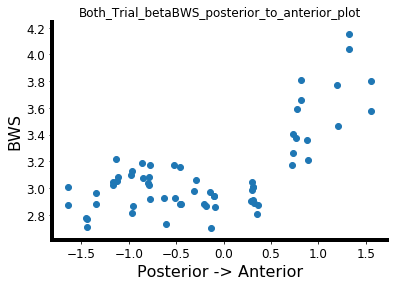

In [19]:
# Make topos, for each state, within and between datasets, for all features and bands
spatial_corr_trial, corr_trial_stats = make_topos_dict([PBA_trial_results, rtPB_trial_results],
                                     label="Trial", eeg_dat_info=eeg_dat.info, pos=pos, save_fig=SAVE_FIGS)
spatial_corr_rest, corr_rest_stats = make_topos_dict([PBA_rest_results, rtPB_rest_results],label="Rest",
                                    eeg_dat_info=eeg_dat.info, pos=pos, save_fig=SAVE_FIGS)
spatial_exponent_corr_trial, exp_trial_stats = make_topos_array([PBA_trial_exponent_results, rtPB_trial_exponent_results],
                                            label="Trial", eeg_dat_info=eeg_dat.info, pos=pos,
                                            feats=['Offsets', 'Exponent'], save_fig=SAVE_FIGS)
spatial_exponent_corr_rest, exp_rest_stats = make_topos_array([PBA_rest_exponent_results, rtPB_rest_exponent_results], 
                                            label="Rest", eeg_dat_info=eeg_dat.info, pos=pos,                                             
                                            feats=['Offsets', 'Exponent'], save_fig=SAVE_FIGS)

# Analyses Across TIME

C:\Users\abc\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\abc\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\abc\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


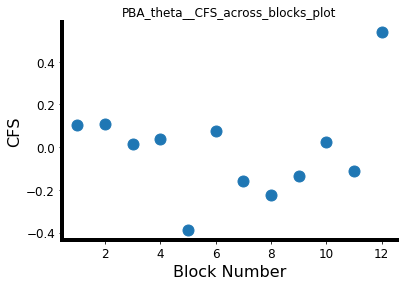

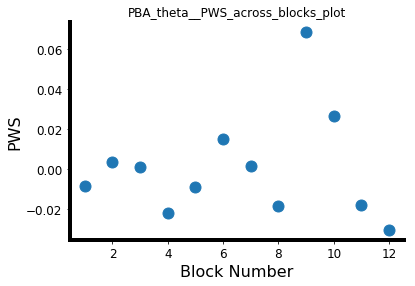

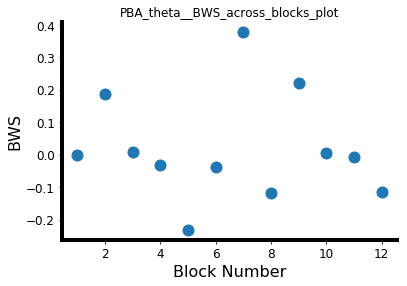

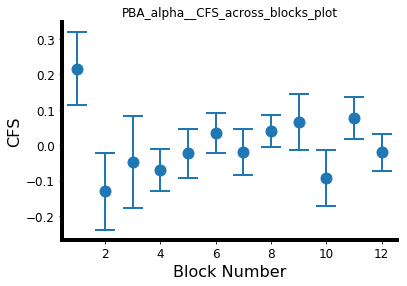

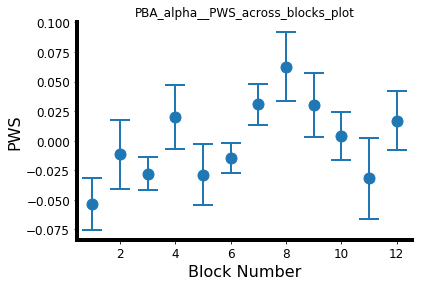

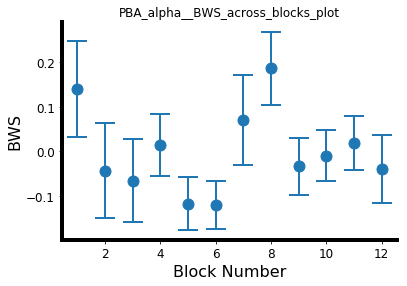

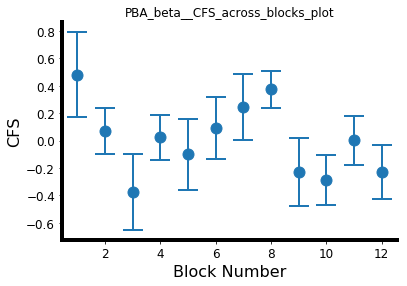

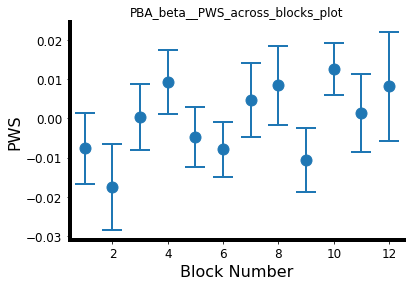

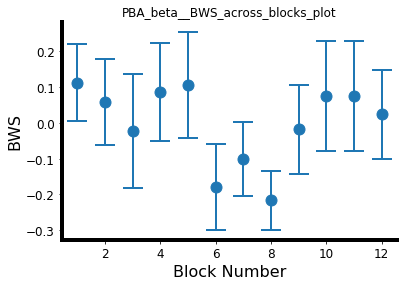

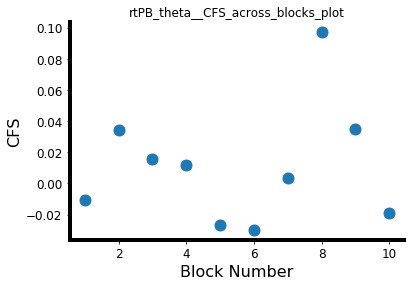

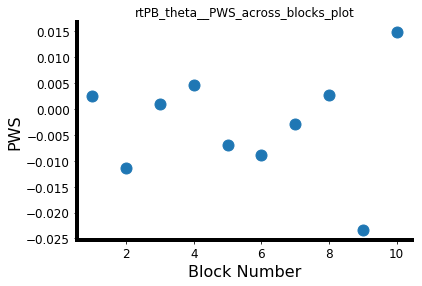

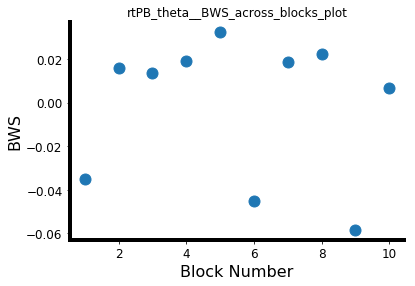

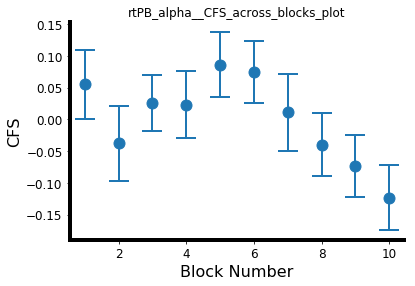

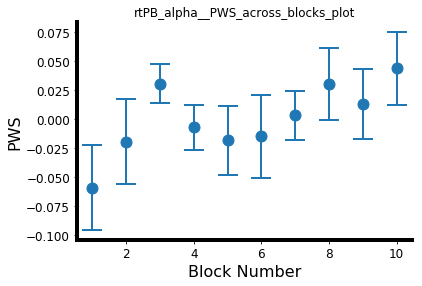

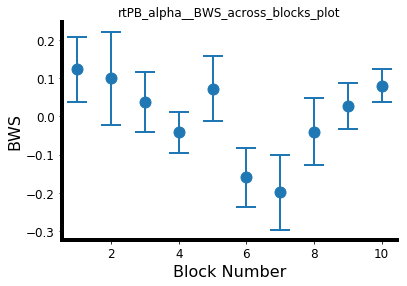

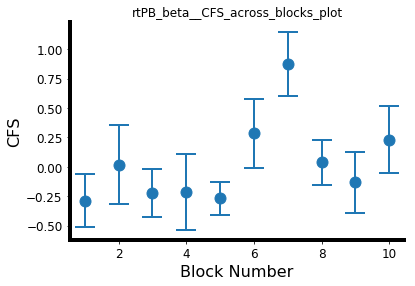

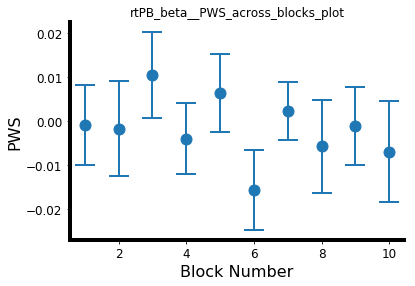

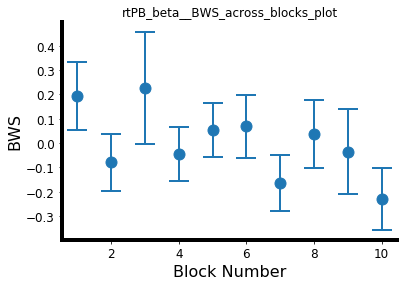

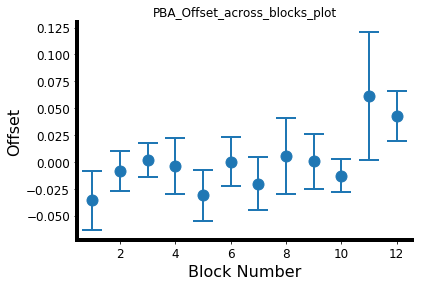

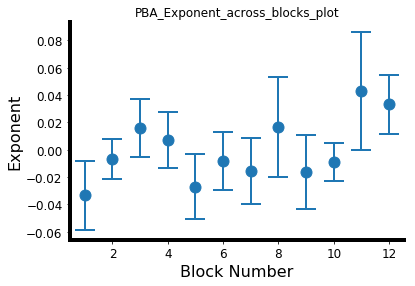

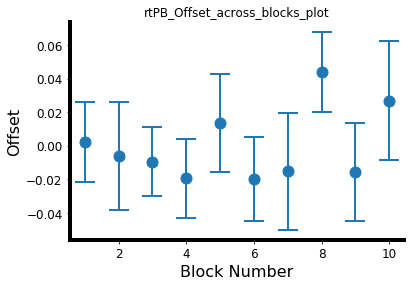

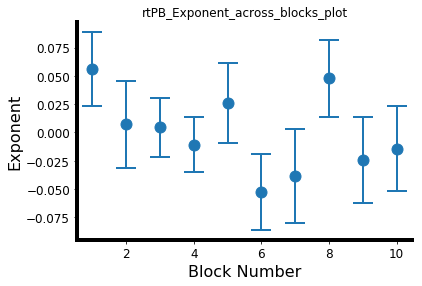

In [22]:
PBA_across_oscs_corr_trial = run_dict_across_blocks('PBA', PBA_trial_results, pos_ch_cluster_index, SAVE_FIGS)
rtPB_across_oscs_corr_trial = run_dict_across_blocks('rtPB', rtPB_trial_results, pos_ch_cluster_index, SAVE_FIGS)

PBA_across_exponent_corr_trial = run_array_across_blocks('PBA', PBA_trial_exponent_results,
                                                      pos_ch_cluster_index, ['Offset', 'Exponent'], SAVE_FIGS)
rtPB_across_exponent_corr_trial = run_array_across_blocks('rtPB', rtPB_trial_exponent_results,
                                                       pos_ch_cluster_index, ['Offset', 'Exponent'], SAVE_FIGS)

In [23]:
PBA_across_oscs_corr_trial

{'PBA_theta__CFS': (0.12577356741256301, 0.6969152744222158),
 'PBA_theta__PWS': (0.28332059690408573, 0.37220071176431585),
 'PBA_theta__BWS': (-0.16695595157202361, 0.604024024475696),
 'PBA_alpha__CFS': (-0.39296688172719274, 0.20635003809858748),
 'PBA_alpha__PWS': (0.5527639927658274, 0.0623301828964307),
 'PBA_alpha__BWS': (0.2575892374824771, 0.41892626418424067),
 'PBA_beta__CFS': (-0.14223502980930725, 0.6592401075677294),
 'PBA_beta__PWS': (0.6388839266392686, 0.025327669811135278),
 'PBA_beta__BWS': (-0.320064548795913, 0.31048141479911984)}

In [24]:
rtPB_across_oscs_corr_trial

{'rtPB_theta__CFS': (0.31046023877806406, 0.3826280459152726),
 'rtPB_theta__PWS': (-0.27887929476477136, 0.43522422719664094),
 'rtPB_theta__BWS': (nan, 1.0),
 'rtPB_alpha__CFS': (-0.46958832652863536, 0.17089566832777267),
 'rtPB_alpha__PWS': (0.2212146429824096, 0.5390862102817162),
 'rtPB_alpha__BWS': (-0.16615932551056095, 0.646396445020155),
 'rtPB_beta__CFS': (0.2763220705944328, 0.4396220095899448),
 'rtPB_beta__PWS': (-0.3446072878017678, 0.32949364599513487),
 'rtPB_beta__BWS': (-0.5907932767123533, 0.07210507304315683)}

In [25]:
PBA_across_exponent_corr_trial

{'PBA_Offset': (0.4803731147444635, 0.11394718920424109),
 'PBA_Exponent': (0.5264499681784544, 0.07868513573001112)}

In [26]:
rtPB_across_exponent_corr_trial

{'rtPB_Offset': (0.6650520794099881, 0.03587433847412613),
 'rtPB_Exponent': (-0.3047374000316502, 0.3919188701343144)}

# Correlations between two blocks

# rtPB - Rest

In [27]:
corrs = np.zeros(shape=[14, 4])
osc_dat = rtPB_rest_results['alpha']
slo_dat = rtPB_rest_exponent_results
corr_labels = ['Alpha CF', 'Alpha PWS', 'Alpha BW', '1/f Aperiodic Exponent']
block_name = "rtPB Rest"

for feat_ind in range(osc_dat.shape[3]):
    cur_corrs = []
    for subj_ind in range(osc_dat.shape[0]):
        r_val, p_val = pearsonr(osc_dat[subj_ind, 0, :, feat_ind], osc_dat[subj_ind, 1, :, feat_ind])
        corrs[subj_ind-1, feat_ind] = r_val

for subj_ind in range(slo_dat.shape[0]):
    r_val, p_val = pearsonr(slo_dat[subj_ind, 0, :, 1], slo_dat[subj_ind, 1, :, 1])
    corrs[subj_ind-1, 3] = r_val
    
# Drop nan rows from corrs
corrs = corrs[~np.isnan(corrs).any(axis=1)]

C:\Users\abc\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


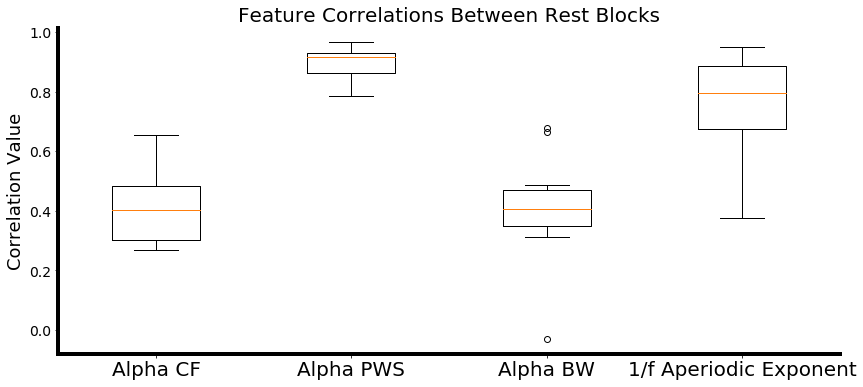

In [28]:
## before dat became slo_dat
plot_corrs_boxplot(corrs, corr_labels, 'AcrossRestCorrs', SAVE_FIGS)
plt.savefig('RestCorrs.png', bbox_inches='tight', dpi=300)

# PBA - rest
Can't be done as PBA only has one rest block

# rtPB - Trial

In [29]:
corrs = np.zeros(shape=[14, 4])
osc_dat = rtPB_trial_results['alpha']
slo_dat = rtPB_trial_exponent_results
corr_labels = ['Alpha CF', 'Alpha PWS', 'Alpha BW', '1/f Aperiodic Exponent']
block_name = "rtPB Trial"

for feat_ind in range(osc_dat.shape[3]):
    cur_corrs = []
    for subj_ind in range(osc_dat.shape[0]):
        r_val, p_val = pearsonr(osc_dat[subj_ind, 0, :, feat_ind], osc_dat[subj_ind, 1, :, feat_ind])
        corrs[subj_ind-1, feat_ind] = r_val

for subj_ind in range(slo_dat.shape[0]):
    r_val, p_val = pearsonr(slo_dat[subj_ind, 0, :, 1], slo_dat[subj_ind, 1, :, 1])
    corrs[subj_ind-1, 3] = r_val
    
# Drop nan rows from corrs
corrs = corrs[~np.isnan(corrs).any(axis=1)]

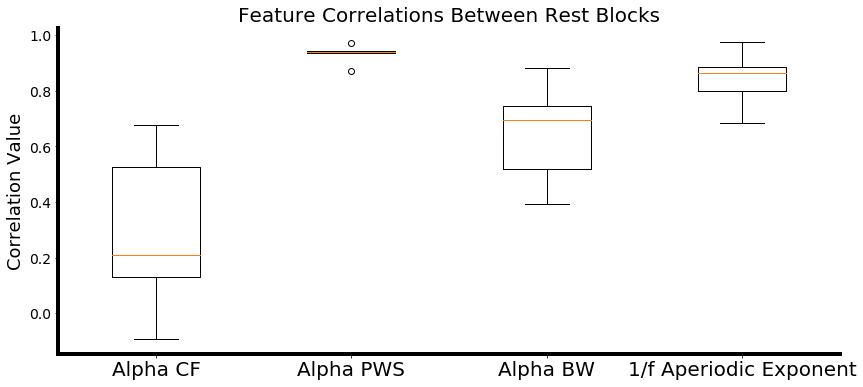

In [30]:
plot_corrs_boxplot(corrs, corr_labels, 'AcrossTrialCorrs', SAVE_FIGS)
plt.savefig('RestCorrs.png', bbox_inches='tight', dpi=300)

# PBA - trial

In [31]:
corrs = np.zeros(shape=[14, 4])
osc_dat = PBA_trial_results['alpha']
slo_dat = PBA_trial_exponent_results
corr_labels = ['Alpha CF', 'Alpha PWS', 'Alpha BW', '1/f Aperiodic Exponent']
block_name = "PBA Trial"

for feat_ind in range(osc_dat.shape[3]):
    cur_corrs = []
    for subj_ind in range(osc_dat.shape[0]):
        r_val, p_val = pearsonr(osc_dat[subj_ind, 0, :, feat_ind], osc_dat[subj_ind, 1, :, feat_ind])
        corrs[subj_ind-1, feat_ind] = r_val

for subj_ind in range(slo_dat.shape[0]):
    r_val, p_val = pearsonr(slo_dat[subj_ind, 0, :, 1], slo_dat[subj_ind, 1, :, 1])
    corrs[subj_ind-1, 3] = r_val
    
# Drop nan rows from corrs
corrs = corrs[~np.isnan(corrs).any(axis=1)]

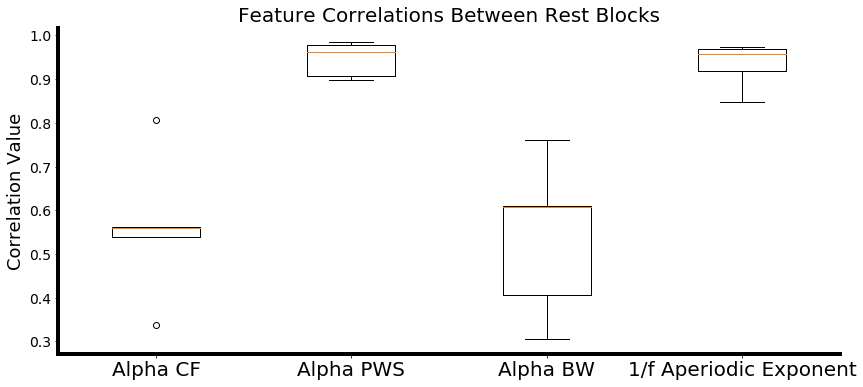

In [32]:
## before dat became slo_dat
plot_corrs_boxplot(corrs, corr_labels, 'AcrossRestCorrs', SAVE_FIGS)
plt.savefig('RestCorrs.png', bbox_inches='tight', dpi=300)

# Subject Variability Plots

In [33]:
# Get all rest
all_rest = combine_groups_dict(rtPB_rest_results, PBA_rest_results)
rest_alphas = all_rest['alpha'][:, 30, :]

C:\Users\abc\Anaconda3\lib\site-packages\fooof\core\funcs.py:37: RuntimeWarning: divide by zero encountered in true_divide
  ys = ys + hgt * np.exp(-(xs-ctr)**2 / (2*wid**2))


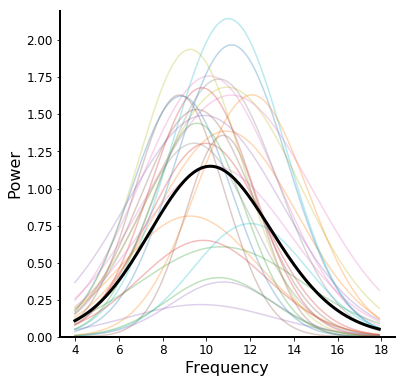

In [34]:
# Plot rest alpha variability
plot_oscillations(rest_alphas, SAVE_FIGS, save_name='OscillationVariability')
plt.savefig('OscillationVariability')

In [35]:
# Get all aperiodics
all_exponents = combine_groups_array(rtPB_rest_exponent_results, PBA_rest_exponent_results)

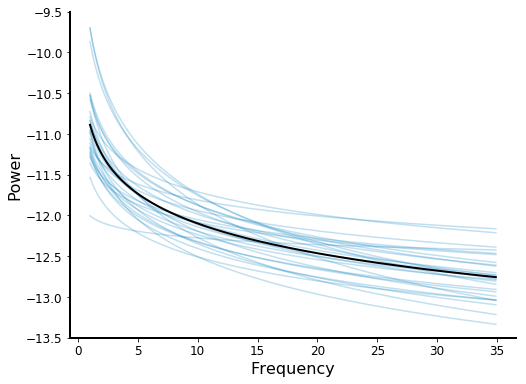

In [36]:
# Plot aperiodic variability
plot_aperiodic(all_exponents[:, 30, :], SAVE_FIGS, save_name='BackgroundVariability')
plt.savefig('BackgroundVariability')